##Library and PyPI

In [1]:
# library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Data Preprocessing

In [2]:
# load data into the dataset
dataset = pd.read_csv("https://salaries.freshremote.work/download/salaries.csv")

In [3]:
#split dataset by year
dataset_2021 = dataset[dataset["work_year"] == '2021']
dataset_2020 = dataset[dataset["work_year"] == '2020']
dataset_2021e = dataset[dataset["work_year"] == '2022e']

## Know your data

In [4]:
dataset.work_year.unique() 

array(['2022e', '2021', '2020', '2021e'], dtype=object)

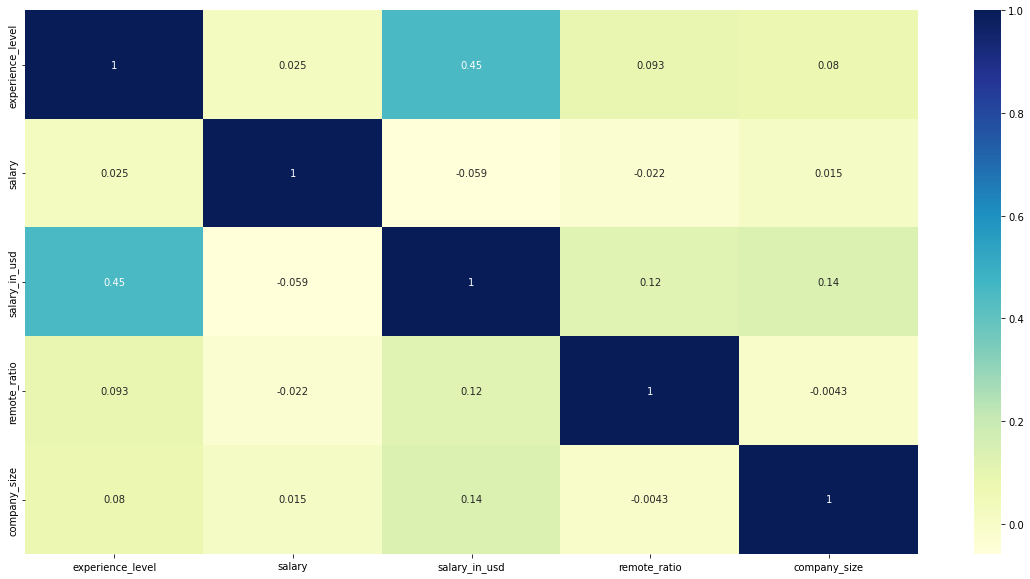

In [5]:
#check the correlation of the dataset
mapping = {'S': 1, 'M': 2,'L':3}
dataset=dataset.replace(to_replace="M",value=2)
dataset=dataset.replace(to_replace="L",value=3)
dataset=dataset.replace(to_replace="S",value=1)

dataset=dataset.replace(to_replace="EN",value=1)
dataset=dataset.replace(to_replace="MI",value=2)
dataset=dataset.replace(to_replace="SE",value=3)
dataset=dataset.replace(to_replace="EX",value=4)
corr = dataset.corr()
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corr,annot=True,cmap = 'YlGnBu')
plt.savefig("correlation.png")

In [ ]:
#  we need to know the difference between 2020, 2021e and 2021


# County IDs not in geometric data
dataset_2020_job = dataset_2020.job_title.unique()
dataset_2021_job = dataset_2021.job_title.unique()
dataset_2021e_job = dataset_2021e.job_title.unique()

# Find IDs only in one of the two county ID sets
# Find the set exclusive-or of two arrays.
unmatched_ids_20_21 = np.setxor1d(dataset_2021_job,dataset_2020_job) 
unmatched_ids_20_21e = np.setxor1d(dataset_2021e_job,dataset_2020_job) 


In [ ]:
# print(f"salary in 2020 but not in 2021: \n{dataset_2020[dataset_2020.job_title.isin(unmatched_ids_20_21)].job_title.unique()}")
data_in_20_not_in_21 = dataset_2020[dataset_2020.job_title.isin(unmatched_ids_20_21)].job_title.unique()
dataset[dataset.job_title == 'Associate Product Manager']
data_in_21_not_in_20 = dataset_2021[dataset_2021.job_title.isin(unmatched_ids_20_21)].job_title.unique()
# print(f"salary in 2021 but not in 2020: \n{dataset_2021[dataset_2021.job_title.isin(unmatched_ids_20_21)].job_title.unique()}")

# print(f"salary in 2020 but not in 2021e: \n{dataset_2020[dataset_2020.job_title.isin(unmatched_ids_20_21e)].job_title.unique()}")
# print(f"salary in 2021e but not in 2020: \n{dataset_2021e[dataset_2021e.job_title.isin(unmatched_ids_20_21e)].job_title.unique()}")

In [ ]:
# we only consider the job title both in 2020 and 2021
pure_data_2020_def = dataset_2020.drop(dataset_2020[dataset_2020.job_title.isin(data_in_20_not_in_21)].index)
pure_data_2021_def = dataset_2021.drop(dataset_2021[dataset_2021.job_title.isin(data_in_21_not_in_20)].index)
#sort value
pure_data_2020_def = pure_data_2020_def.sort_values("salary_in_usd")
pure_data_2021_def = pure_data_2021_def.sort_values("salary_in_usd")
display(pure_data_2020_def.tail(10))
display(pure_data_2021_def.tail(10))

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1090,2020,3,FT,Cloud Engineer,180000,USD,180000,US,50,US,3
458,2020,2,FT,Security Engineer,192000,USD,192000,US,100,US,3
1209,2020,3,CT,Cyber Security Analyst,150000,GBP,192396,GB,100,GB,3
1165,2020,3,FT,Software Security Engineer,300000,AUD,206620,AU,100,US,3
954,2020,3,FT,DevOps Engineer,280000,CAD,208849,CA,50,CA,3
1116,2020,2,FT,Cloud DevOps Engineer,200000,EUR,228094,FR,100,FR,2
1185,2020,3,FT,Information Security Manager,252000,USD,252000,US,100,US,2
1126,2020,3,FT,DevOps Engineer,275000,USD,275000,US,100,US,3
1197,2020,3,FT,Security Engineer,300000,USD,300000,US,50,US,3
1319,2020,3,FT,Data Scientist,412000,USD,412000,US,100,US,3


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
101,2021,2,FT,Information Security Analyst,120000,USD,120000,US,100,US,3
17,2021,2,FT,Information Security Manager,128000,USD,128000,US,100,US,3
7,2021,2,FT,Security Engineer,130000,USD,130000,US,100,US,3
22,2021,3,FT,DevOps Engineer,120000,CHF,131245,CH,100,CH,1
97,2021,3,FT,Security Engineer,145000,USD,145000,US,50,US,3
104,2021,3,FT,Cyber Security Engineer,150000,USD,150000,US,100,US,3
24,2021,3,FL,Copywriter,220000,CAD,175477,CA,100,CA,3
88,2021,3,FT,Site Reliability Engineer,245000,USD,245000,US,100,US,3
103,2021,2,FT,Software Security Engineer,320000,USD,320000,US,50,US,3
93,2021,2,FT,Cyber Security Analyst,500000,USD,500000,KZ,100,KZ,1


## Fairness:

In [ ]:
# about data scientist with junior experience level
data_scientist_2020 = pure_data_2020_def[pure_data_2020_def.job_title == "Data Scientist"]
data_scientist_2020_level =  (
    data_scientist_2020.groupby(["experience_level","employment_type"])
    .mean()
    .reset_index()
)
data_scientist_2020_level 

,experience_level,employment_type,salary,salary_in_usd,remote_ratio,company_size
0,1,FT,8.000000e+04,83863.000000,75.000000,1.000000
1,1,PT,1.900000e+04,21669.000000,50.000000,1.000000
2,2,FT,1.288123e+06,73722.444444,83.333333,1.777778
3,3,FT,1.973333e+05,200142.666667,83.333333,3.000000


In [ ]:
data_scientist_2020_country =  (
    data_scientist_2020.groupby(["experience_level","employment_type","company_location"])
    .mean()
    .reset_index()
)
data_scientist_2020_country

,experience_level,employment_type,company_location,salary,salary_in_usd,remote_ratio,company_size
0,1,FT,DE,5.500000e+04,62726.000000,50.000000,1.0
1,1,FT,US,1.050000e+05,105000.000000,100.000000,1.0
2,1,PT,IT,1.900000e+04,21669.000000,50.000000,1.0
3,2,FT,ES,3.400000e+04,38776.000000,100.000000,2.0
4,2,FT,FR,3.700000e+04,42197.000000,50.000000,1.0
5,2,FT,GB,6.000000e+04,76958.000000,100.000000,1.0
6,2,FT,HU,1.100000e+07,35735.000000,50.000000,3.0
7,2,FT,LU,5.500000e+04,62726.000000,50.000000,1.0
8,2,FT,US,1.017775e+05,101777.500000,100.000000,2.0
9,3,FT,US,1.973333e+05,200142.666667,83.333333,3.0


In [ ]:
data_scientist_2021 = pure_data_2021_def[pure_data_2021_def.job_title == "Data Scientist"]
data_scientist_2021_level =  (
    data_scientist_2021.groupby(["experience_level","employment_type"])
    .mean()
    .reset_index()
)
data_scientist_2021_level

# As man see here we do not have enough data in the 2021 definitive, so we use an estimate dataset

,experience_level,employment_type,salary,salary_in_usd,remote_ratio,company_size
0,1,FT,42000,49646,50,2


In [ ]:
data_scientist_2021e = dataset_2021e[dataset_2021e.job_title == "Data Scientist"]
# there is no data scientist in 2021e

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size


In [ ]:
# classifier could be level, sensitive attribute could be country, we do not have any like false positive rate

## Hypothesis test: How big is the location influence for each level
Test whether the mean salary for each level differ across the job title
Which conclusion can draw at the 1% significance level? USA and not USA

In [ ]:
pure_data_2020_def.job_title.unique()

array(['DevOps Engineer', 'Cyber Security Analyst', 'Data Analyst',
       'Data Scientist', 'Cyber Security Specialist',
       'Cloud DevOps Engineer', 'Site Reliability Engineer',
       'Information Security Engineer', 'Penetration Tester',
       'Security Engineer', 'Cyber Security Engineer', 'Copywriter',
       'Information Security Analyst', 'Information Security Manager',
       'Cloud Engineer', 'Information Security Specialist',
       'Backend Software Engineer', 'IT Security Analyst',
       'Security Analyst', 'Digital Forensics Analyst',
       'Software Security Engineer'], dtype=object)

In [ ]:
# we first need to select which belong to the AI and ML salaries
not_ai_jobs_2020 = ['Copywriter','Site Reliability Engineer','Penetration Tester','Backend Software Engineer']
pure_data_2020 = pure_data_2020_def.drop(pure_data_2020_def[pure_data_2020_def.job_title.isin(not_ai_jobs_2020)].index)
pure_data_2020_USA =  pure_data_2020[pure_data_2020.company_location=='US']
pure_data_2020_not_USA = pure_data_2020[pure_data_2020.company_location!='US']

In [ ]:
# group by different level
# we should set it to FT

pure_data_2020_USA_1 = pure_data_2020_USA[pure_data_2020_USA.experience_level == 1]
pure_data_2020_USA_1_FT = pure_data_2020_USA_1[pure_data_2020_USA_1.employment_type == 'FT']

pure_data_2020_not_USA_1 = pure_data_2020_not_USA[pure_data_2020_not_USA.experience_level == 1]
pure_data_2020_not_USA_1_FT = pure_data_2020_not_USA_1[pure_data_2020_not_USA_1.employment_type == 'FT']

display(pure_data_2020_USA_1_FT.head(10))
display(pure_data_2020_not_USA_1_FT.head(10))

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1242,2020,1,FT,Information Security Analyst,60000,USD,60000,US,100,US,3
981,2020,1,FT,Cyber Security Analyst,60000,USD,60000,US,50,US,3
467,2020,1,FT,Cyber Security Analyst,66000,USD,66000,US,50,US,3
1024,2020,1,FT,Data Analyst,72000,USD,72000,US,100,US,3
377,2020,1,FT,Cyber Security Engineer,75000,USD,75000,US,100,US,3
1170,2020,1,FT,Cyber Security Engineer,76960,USD,76960,US,50,US,3
759,2020,1,FT,Cloud DevOps Engineer,80000,USD,80000,US,100,US,3
464,2020,1,FT,Cyber Security Analyst,80000,USD,80000,US,100,US,2
879,2020,1,FT,DevOps Engineer,80000,USD,80000,US,100,US,3
391,2020,1,FT,Cyber Security Analyst,80000,USD,80000,US,50,US,3


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
36,2020,1,FT,Cyber Security Analyst,425000,INR,5734,IN,100,IN,3
257,2020,1,FT,Data Analyst,10000,USD,10000,NG,100,NG,1
945,2020,1,FT,DevOps Engineer,75000,PLN,19254,PL,100,PL,2
272,2020,1,FT,DevOps Engineer,20000,USD,20000,HR,50,HR,3
1281,2020,1,FT,Cyber Security Analyst,23000,EUR,26230,IT,100,IT,3
1071,2020,1,FT,Cloud DevOps Engineer,32000,USD,32000,LT,50,LT,3
1314,2020,1,FT,Security Engineer,28250,GBP,36234,GB,100,GB,2
1175,2020,1,FT,Cyber Security Specialist,34000,EUR,38776,IT,50,IT,3
1221,2020,1,FT,Cyber Security Engineer,35000,GBP,44892,GB,100,GB,3
1123,2020,1,FT,DevOps Engineer,40000,GBP,51305,GB,50,GB,1


In [ ]:
# t-test
import scipy
p = scipy.stats.ttest_ind(pure_data_2020_USA_1_FT.salary_in_usd, pure_data_2020_not_USA_1_FT.salary_in_usd, axis=0, equal_var=False).pvalue
print('p-value',p)

p-value 3.128771093496715e-06


## Salary  TOP 10 analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



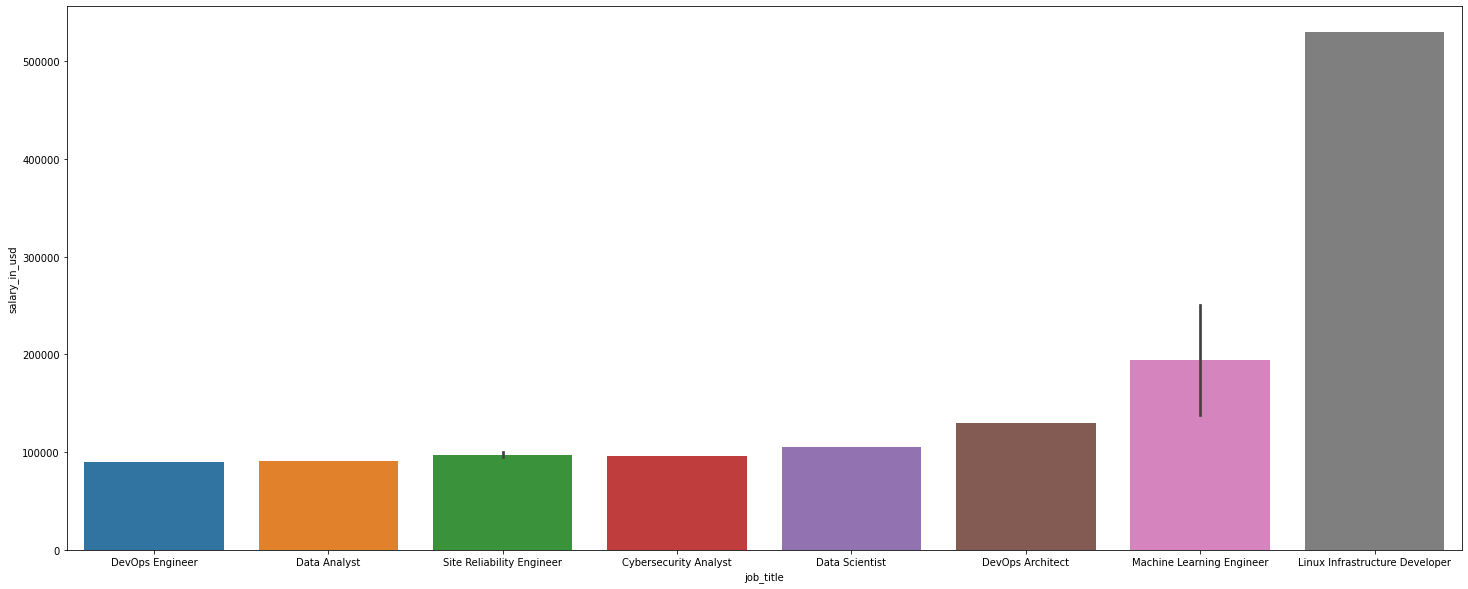

In [ ]:
# plt.scatter(job_title_2020[-10:],salary_2020[-10:])
fig, ax = plt.subplots(figsize=(25,10))
data_2021 = dataset_en_2021_FT[dataset_en_2021_FT.salary_in_usd >=90000 ]
ax = sns.barplot("job_title", "salary_in_usd", data=data_2020)
# ax = sns.barplot("job_title", "salary_in_usd", data=data_2021)

From the above graph we saw that the salary has strong correlation to the the experience level

In [ ]:
# get all the EN from experience_level with Full-TIME
dataset_en_2020 = dataset_en[dataset_en.work_year == '2020']
dataset_en_2020_FT = dataset_en_2020[dataset_en_2020.employment_type == 'FT']
job_title_2020 = dataset_en_2020_FT.job_title.tolist()
salary_2020 = dataset_en_2020_FT.salary_in_usd.tolist()
dataset_en_2020_FT.tail(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
880,2020,EN,FT,DevOps Engineer,90000,USD,90000,USA,100,USA,M
474,2020,EN,FT,Data Analyst,91000,USD,91000,USA,100,USA,L
271,2020,EN,FT,Site Reliability Engineer,95000,USD,95000,USA,100,USA,L
174,2020,EN,FT,Cybersecurity Analyst,96000,USD,96000,USA,50,USA,L
1060,2020,EN,FT,Site Reliability Engineer,100000,USD,100000,USA,50,USA,M
1317,2020,EN,FT,Data Scientist,105000,USD,105000,USA,100,USA,S
928,2020,EN,FT,DevOps Architect,130000,USD,130000,CHE,100,CHE,L
262,2020,EN,FT,Machine Learning Engineer,138000,USD,138000,USA,100,USA,S
240,2020,EN,FT,Machine Learning Engineer,250000,USD,250000,USA,50,USA,L
720,2020,EN,FT,Linux Infrastructure Developer,710000,CAD,529582,CAN,50,CAN,L


In [ ]:
dataset_en_2022e = dataset_en[dataset_en.work_year == '2022e']
dataset_en_2022e.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
38,2022e,EN,FT,ML Engineer,20000,EUR,22627,PRT,100,PRT,L
13,2022e,EN,FT,IT DevOps Engineer,30000,USD,30000,NGA,100,USA,M
29,2022e,EN,FT,Cybersecurity Analyst,52000,USD,52000,USA,50,USA,S
32,2022e,EN,FT,Cyber Threat Analyst,99000,USD,99000,CAN,100,CAN,L
2,2022e,EN,FT,Financial Data Analyst,100000,USD,100000,USA,50,USA,L
42,2022e,EN,FT,Data Engineer,120000,USD,120000,USA,100,USA,M


In [ ]:
dataset_en_2021e = dataset_en[dataset_en.work_year == '2021e']
job_title_2021e = dataset_en_2021e.job_title.tolist()
salary_2021e = dataset_en_2021e.salary_in_usd.tolist()
dataset_en_2021e.tail(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
349,2021e,EN,FT,Ethical Hacker,119000,USD,119000,USA,100,USA,L
1478,2021e,EN,FT,Software Engineer in Test,120000,USD,120000,USA,50,USA,L
1159,2021e,EN,FT,Cyber Security Researcher,125000,USD,125000,USA,50,USA,L
180,2021e,EN,FT,Machine Learning Engineer,125000,USD,125000,USA,100,USA,S
640,2021e,EN,FT,Platform Engineer,126000,USD,126000,USA,100,USA,L
825,2021e,EN,FT,DevOps Engineer,126500,USD,126500,USA,100,USA,L
510,2021e,EN,FT,Platform Engineer,135000,USD,135000,USA,100,USA,L
802,2021e,EN,FT,DevOps Engineer,150000,USD,150000,USA,100,USA,M
200,2021e,EN,FT,Cyber Security Engineer,150000,EUR,177308,BGR,100,GBR,L
300,2021e,EN,FT,Machine Learning Scientist,225000,USD,225000,USA,100,USA,L


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



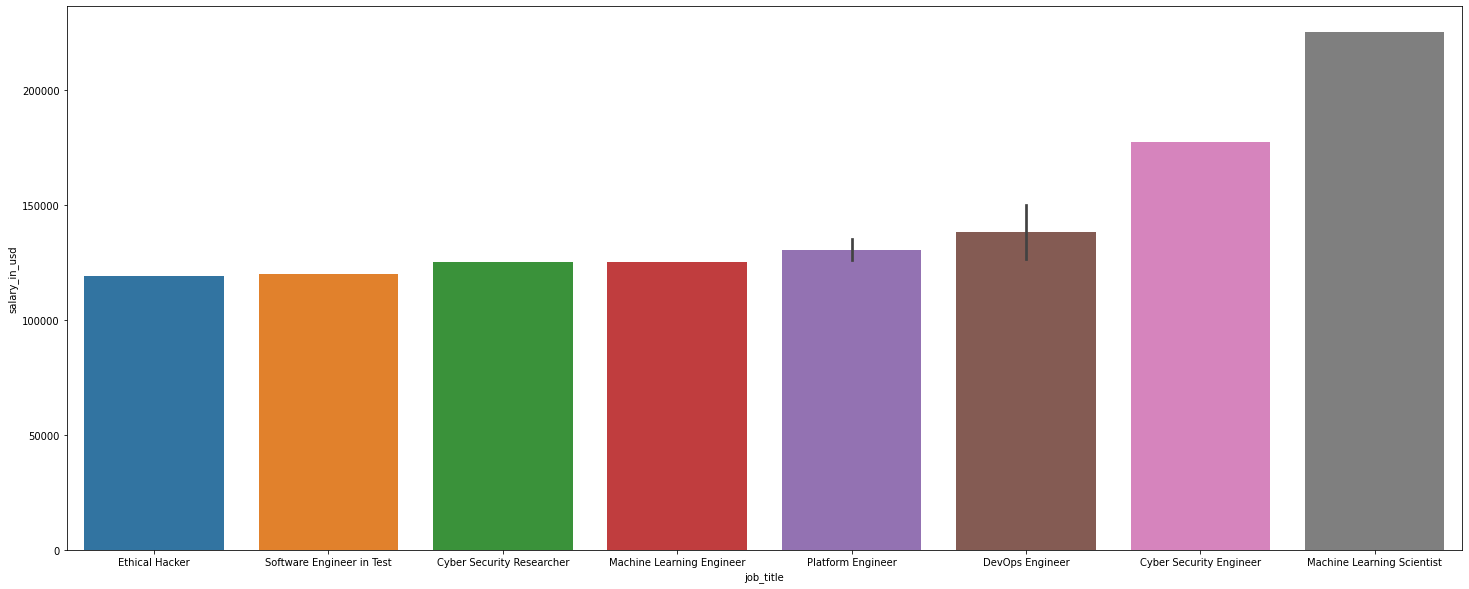

In [ ]:

fig, ax = plt.subplots(figsize=(25,10))
data_2021e = dataset_en_2021e[dataset_en_2021e.salary_in_usd >=119000 ]
ax = sns.barplot("job_title", "salary_in_usd", data=data_2021e)

In [ ]:
dataset_en_2021 = dataset_en[dataset_en.work_year == '2021']
dataset_en_2021_FT = dataset_en_2021[dataset_en_2021.employment_type == 'FT']
job_title_2021 = dataset_en_2021_FT.job_title.tolist()
salary_2021 = dataset_en_2021_FT.salary_in_usd.tolist()
dataset_en_2021_FT.tail(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
44,2021,EN,FT,Data Scientist,42000,EUR,49646,FRA,50,FRA,M
105,2021,EN,FT,Data Analyst,50000,USD,50000,USA,100,USA,M
12,2021,EN,FT,Security Analyst,50000,USD,50000,USA,100,USA,S
37,2021,EN,FT,Cyber Security Analyst,60000,USD,60000,USA,50,USA,L
102,2021,EN,FT,Security Analyst,75000,USD,75000,USA,100,USA,S
96,2021,EN,FT,Cyber Security Analyst,76200,USD,76200,USA,50,USA,L
3,2021,EN,FT,Cloud DevOps Engineer,90000,USD,90000,USA,100,USA,M


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



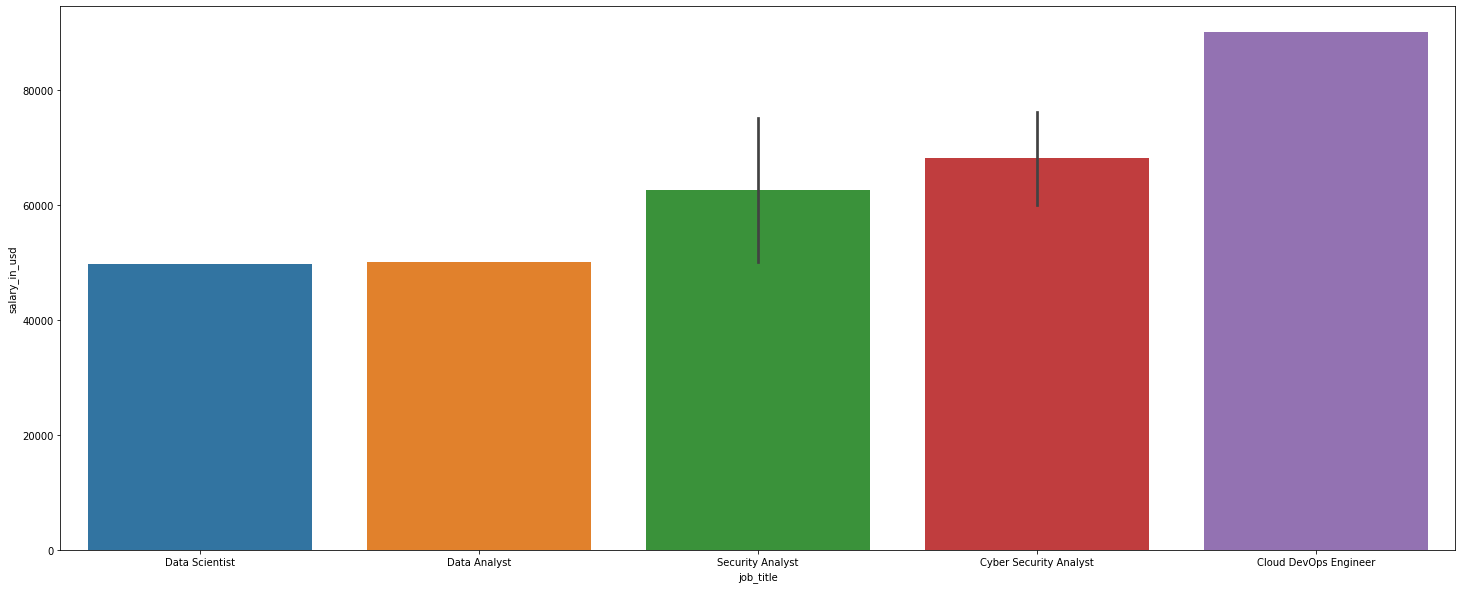

In [ ]:

fig, ax = plt.subplots(figsize=(25,10))
data_2021_FT = dataset_en_2021_FT[dataset_en_2021_FT.salary_in_usd >=49646 ]
ax = sns.barplot("job_title", "salary_in_usd", data=data_2021_FT)

In [ ]:
dataset[dataset.job_title == 'Linux Infrastructure Developer']

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
720,2020,EN,FT,Linux Infrastructure Developer,710000,CAD,529582,CAN,50,CAN,L


# Problems: